In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from glob import glob
import pickle

In [4]:
import vdetect

In [5]:
test_images = [mpimg.imread(f) for f in glob('test_images/*.jpg')]

main_region = vdetect.define_main_region_custom()
mr_x0, mr_y0, mr_x1, mr_y1 = main_region

In [6]:
with open('serialize/model_2018-04-13_124025.p', 'rb') as f:
    clf = pickle.load(f)
    
with open('serialize/scaler_2018-04-13_124025.p', 'rb') as f:
    scaler = pickle.load(f)
    
print(clf)
print(scaler)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


(0, 138, 1280, 650)


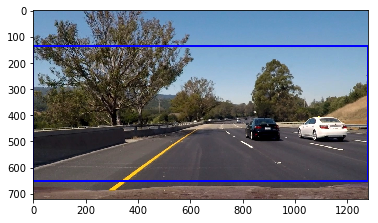

In [7]:
im = test_images[0]

plt.imshow(
    vdetect.draw_boxes(
        im,
        [main_region]
    )
)

print(main_region)

(64, 64, 3)

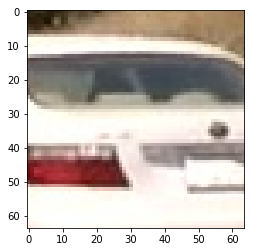

In [8]:
car_reg = vdetect.window_region(im, [1100,400,1100+63,400+63])
plt.imshow(car_reg)
car_reg.shape

In [9]:
extract = vdetect.create_feature_extractor(scaler)

car_reg_features = extract(car_reg)

clf.predict(car_reg_features)

array([ 1.])

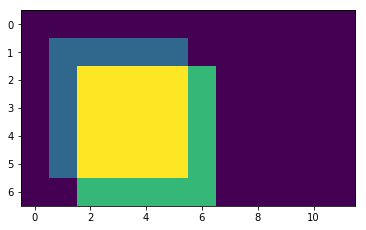

In [10]:
test = np.zeros((7, 12))

vdetect.increment_window(test, [1, 1, 5, 5], 2)
vdetect.increment_window(test, [2, 2, 6, 6], 2)
vdetect.increment_window(test, [2, 2, 6, 6], 2)

plt.imshow(test)